<a href="https://colab.research.google.com/github/pabloga44/TFG/blob/main/Model_3params.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo para 3 parámetros

##Librerías

In [1]:
import sys
import os
import matplotlib.pyplot as plt # for plotting
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/pabloga44/TFG

Cloning into 'TFG'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 144 (delta 78), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (144/144), 1.79 MiB | 6.13 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [4]:
sys.path.insert(0,'/content/TFG')

In [5]:
#Librerias de GitHub
import main as mn
import paint as pt

##Importar datos

In [6]:
InPath = '/content/TFG/data/Input_all.txt'
OutPath = '/content/TFG/data/Output_all.txt'
FrecPath = '/content/TFG/data/Frequencies.txt'

l,x,y = mn.get_data(FrecPath,InPath,OutPath,clean=True)

These params caused NaN, so they were removed: [1.5e-08 2.3e-08 5.2e-01]
These params caused NaN, so they were removed: [2.7e-08 3.7e-08 5.2e-01]
These params caused NaN, so they were removed: [2.70e-08 4.10e-08 1.05e+00]
These params caused NaN, so they were removed: [2.90e-08 4.10e-08 1.05e+00]
These params caused NaN, so they were removed: [3.1e-08 3.7e-08 5.2e-01]


###Ploteamos algunas

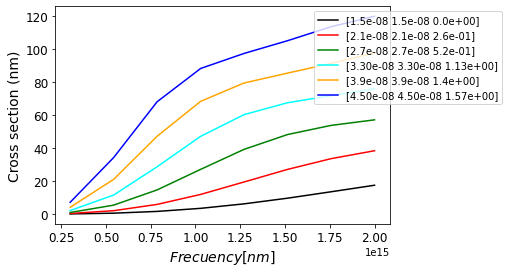

In [7]:
pt.paint_spectra(l,x,y)

###Separación Train Validation Test

In [8]:
x_train,x_validation,x_test,y_train,y_validation,y_test=mn.split_data_3params(x,y)

##Crear y entrenar modelo

In [9]:
model,history= mn.train_model_3params(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='sigmoid',num_epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1208      
Total params: 47,108
Trainable params: 47,108
Non-trainable params: 0
_________________________________________________________________


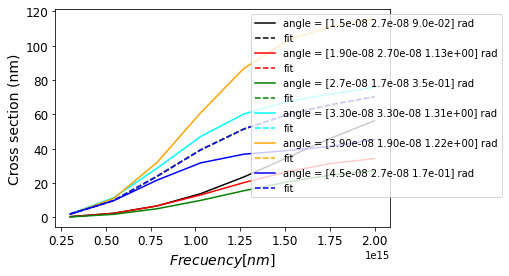

In [10]:
pt.paint_predictions(model,l,x_test,y_test)

##Evaluar modelo

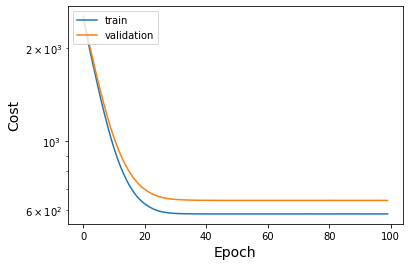

In [11]:
pt.paint_costs(history)